**Import statements**

In [2]:
import pandas as pd
from os.path import join
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

import keras
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Convert JSON file to CSV - University Statistics**

In [4]:
df = pd.read_json("/content/drive/MyDrive/schoolInfo.json")
df.to_csv("SchoolInfo.csv", index= None)

**Reading CSV file into dataframe - University Statistics**

In [5]:
university_stats_dataset = pd.read_csv("SchoolInfo.csv")
university_stats_dataset

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,NaN,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,NaN,NaN,national-universities,1,private,NaN,ranked,2627
1,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,NaN,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,NaN,NaN,national-universities,2,private,NaN,ranked,2155
2,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,NaN,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,NaN,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,NaN,NaN,national-universities,3,private,NaN,ranked,1426
4,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,NaN,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,NaN,NaN,national-universities,5,private,NaN,ranked,2707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Cypress,tridentuniversityinternational,90630,NaN,96.0,NaN,NaN,NaN,CA,-2,NaN,trident-university-international,National Universities,Unranked,overall,450979,False,True,NaN,9000,NaN,Trident University International,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,41279
307,NaN,School refused to fill out U.S. News statistic...,True,NaN,https://www.usnews.com/img/college-photo_14624...,https://www.usnews.com/img/college-photo_14624...,NaN,NaN,Cincinnati,unioninstituteanduniversity,45206,NaN,NaN,NaN,NaN,NaN,OH,-2,NaN,union-institute,National Universities,Unranked,overall,206279,False,True,NaN,12416,NaN,Union Institute and University,national-universities,NaN,NaN,national-universities,-2,private,NaN,ur,10923
308,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Phoenix,universityofphoenix,85034,NaN,NaN,NaN,NaN,NaN,AZ,-2,NaN,university-of-phoenix,National Universities,Unranked,overall,372213,False,True,NaN,9690,NaN,University of Phoenix,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,209885
309,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Minneapolis,waldenuniversity,55401,NaN,NaN,NaN,NaN,NaN,MN,-2,NaN,walden-university,National Universities,Unranked,overall,125231,False,True,NaN,120

**Displaying top 10 entries of University Statistics dataset**

In [6]:
university_stats_dataset.head(10)

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,NaN,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,NaN,NaN,national-universities,1,private,NaN,ranked,2627
1,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,NaN,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,NaN,NaN,national-universities,2,private,NaN,ranked,2155
2,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,NaN,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,NaN,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,NaN,NaN,national-universities,3,private,NaN,ranked,1426
4,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,NaN,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,NaN,NaN,national-universities,5,private,NaN,ranked,2707
5,NaN,NaN,False,33.0,https://www.usnews.com/img/college-photo_6935.jpg,https://www.usnews.com/img/college-photo_6935_...,1460.0,4524.0,Cambridge,massachusettsinstituteoftechnology,2139,NaN,8.0,95.0,58.0,20331.0,MA,5,NaN,mit,National Universities,#5,overall,166683,True,True,4.6,49892,4.9,Massachusetts Institute of Technology,national-universities,NaN,MIT,national-universities,5,private,NaN,ranked,2178
6,NaN,NaN,False,31.0,https://www.usnews.com/img/college-photo_10369...,https://www.usnews.com/img/college-photo_10369...,1380.0,7034.0,Stanford,stanforduniversity,94305,NaN,5.0,95.0,47.0,19296.0,CA,5,NaN,stanford,National Universities,#5,overall,243744,True,True,NaN,49617,4.8,Stanford University,national-universities,NaN,NaN,national-universities,5,private,NaN,ranked,1305
7,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_2743.jpg,https://www.usnews.com/img/college-photo_2743_...,1380.0,10019.0,Philadelphia,universityofpennsylvania,19104,NaN,9.0,93.0,47.0,25441.0,PA,8,3.9,university-of-pennsylvania,National Universities,#8,overall,215062,False,True,4.8,53534,3.6,University of Pennsylvania,national-universities,NaN,UPenn,national-universities,8,private,NaN,ranked,3378
8,NaN,NaN,False,31.0,https://www.usnews.com/dims4/USNEWS/7e5b5e0/17...,https://www.usnews.com/dims4/USNEWS/3f12795/17...,1380.0,6609.0,Durham,dukeuniversity,27708,NaN,11.0,92.0,41.0,23374.0,NC,9,NaN,duke-university,National Universities,#9,overall,198419,False,True,NaN,53744,3.7,Duke University,national-universities,NaN,NaN,national-universities,9,private,

**Displaying bottom 10 entries of University Statistics dataset**

In [7]:
university_stats_dataset.tail(10)

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
301,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Orange,argosyuniversity,92868,NaN,NaN,NaN,NaN,NaN,CA,-2,NaN,argosy-university,National Universities,Unranked,overall,145770,False,True,NaN,13152,NaN,Argosy University,national-universities,NaN,Argosy University Chicago,national-universities,-2,proprietary,NaN,ur,21799
302,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,San Francisco,californiainstituteofintegralstudies,94103,NaN,NaN,NaN,NaN,NaN,CA,-2,NaN,california-institute-of-integral-studies,National Universities,Unranked,overall,110316,False,True,NaN,28467,NaN,California Institute of Integral Studies,national-universities,NaN,NaN,national-universities,-2,private,NaN,ur,12154
303,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Minneapolis,capellauniversity,55403,NaN,NaN,NaN,NaN,NaN,MN,-2,NaN,capella-university,National Universities,Unranked,overall,413413,False,True,NaN,13998,NaN,Capella University,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,32673
304,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Pocatello,idahostateuniversity,83209,NaN,NaN,NaN,NaN,NaN,ID,-2,NaN,idaho-state,National Universities,Unranked,overall,142276,False,True,2.4,21023,2.1,Idaho State University,national-universities,NaN,NaN,national-universities,-2,public,NaN,ur,1620
305,NaN,NaN,False,NaN,NaN,NaN,NaN,133.0,San Diego,northcentraluniversity,86314,NaN,NaN,NaN,NaN,NaN,AZ,-2,NaN,northcentral-university,National Universities,Unranked,overall,444130,False,True,NaN,10368,NaN,Northcentral University,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,666122
306,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Cypress,tridentuniversityinternational,90630,NaN,96.0,NaN,NaN,NaN,CA,-2,NaN,trident-university-international,National Universities,Unranked,overall,450979,False,True,NaN,9000,NaN,Trident University International,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,41279
307,NaN,School refused to fill out U.S. News statistic...,True,NaN,https://www.usnews.com/img/college-photo_14624...,https://www.usnews.com/img/college-photo_14624...,NaN,NaN,Cincinnati,unioninstituteanduniversity,45206,NaN,NaN,NaN,NaN,NaN,OH,-2,NaN,union-institute,National Universities,Unranked,overall,206279,False,True,NaN,12416,NaN,Union Institute and University,national-universities,NaN,NaN,national-universities,-2,private,NaN,ur,10923
308,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Phoenix,universityofphoenix,85034,NaN,NaN,NaN,NaN,NaN,AZ,-2,NaN,university-of-phoenix,National Universities,Unranked,overall,372213,False,True,NaN,9690,NaN,University of Phoenix,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,209885
309,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Minneapolis,waldenuniversity,55401,NaN,NaN,NaN,NaN,NaN,MN,-2,NaN,walden-university,National Universities,Unranked,overall,125231,False,True,NaN,12075,NaN,Walden University,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,25042
310,NaN,NaN,False,NaN,NaN,NaN,NaN,8873.0,New Castle,wilmingtonuniversity,19720,NaN,100.0,NaN,NaN,NaN,DE,-2,NaN,wilmington-university,National Universities,Unranked,overall,131113,False,True,NaN,10940,NaN,Wilmington University,national-universities,NaN,NaN,n

**Checking the datatype of each column - University Statistics**

In [8]:
university_stats_dataset.dtypes

rankingNoteText            float64
nonResponderText            object
nonResponder                  bool
act-avg                    float64
primaryPhoto                object
primaryPhotoThumb           object
sat-avg                    float64
enrollment                 float64
city                        object
sortName                    object
zip                          int64
rankingNoteCharacter       float64
acceptance-rate            float64
rankingDisplayScore        float64
percent-receiving-aid      float64
cost-after-aid             float64
state                       object
rankingSortRank              int64
hs-gpa-avg                 float64
urlName                     object
rankingDisplayName          object
rankingDisplayRank          object
ranking                     object
xwalkId                      int64
rankingIsTied                 bool
isPublic                      bool
businessRepScore           float64
tuition                      int64
engineeringRepScore 

**Removing the irrelevant columns from the dataset - University Statistics**

The following columns will be removed from the dataset as they don't convey any useful information

rankingNoteText,
nonResponderText,
nonResponder,
primaryPhoto,
primaryPhotoThumb,
city,
sortName,
zip,
rankingNoteCharacter,
rankingSortRank,
urlName,
rankingDisplayName,
ranking,
xwalkId,
rankingIsTied,
isPublic,
region,
aliasNames,
rankingType,
rankingDisplayScore,
rankingMaxPossibleScore,
rankingRankStatus,
primaryKey

In [9]:
university_stats_dataset = university_stats_dataset.drop(['rankingNoteText', 'nonResponderText', 'nonResponder', 'primaryPhoto', 'primaryPhotoThumb', 'city', 'sortName', 'zip', 'rankingNoteCharacter', 'rankingSortRank', 'urlName', 'rankingDisplayName', 'ranking', 'xwalkId', 'rankingIsTied', 'isPublic', 'region', 'aliasNames', 'rankingType', 'rankingDisplayScore', 'rankingMaxPossibleScore', 'rankingRankStatus', 'primaryKey'], axis = 1)

#university_stats_dataset = university_stats_dataset.drop(['rankingNoteText', 'nonResponderText', 'nonResponder', 'primaryPhoto', 'primaryPhotoThumb', 'rankingNoteCharacter', 'sortName', 'aliasNames'], axis = 1)

university_stats_dataset.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,percent-receiving-aid,cost-after-aid,state,hs-gpa-avg,rankingDisplayRank,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,60.0,16793.0,NJ,3.9,#1,NaN,47140,4.1,Princeton University,national-universities,1,private
1,32.0,1430.0,6710.0,5.0,55.0,16338.0,MA,4.0,#2,NaN,48949,3.6,Harvard University,national-universities,2,private
2,32.0,1450.0,5941.0,8.0,42.0,27767.0,IL,4.0,#3,NaN,54825,NaN,University of Chicago,national-universities,3,private
3,32.0,1420.0,5472.0,6.0,50.0,18385.0,CT,NaN,#3,NaN,51400,3.4,Yale University,national-universities,3,private
4,32.0,1430.0,6113.0,6.0,48.0,21041.0,NY,NaN,#5,NaN,57208,3.8,Columbia University,national-universities,5,private
5,33.0,1460.0,4524.0,8.0,58.0,20331.0,MA,NaN,#5,4.6,49892,4.9,Massachusetts Institute of Technology,national-universities,5,private
6,31.0,1380.0,7034.0,5.0,47.0,19296.0,CA,NaN,#5,NaN,49617,4.8,Stanford University,national-universities,5,private
7,32.0,1380.0,10019.0,9.0,47.0,25441.0,PA,3.9,#8,4.8,53534,3.6,University of Pennsylvania,national-universities,8,private
8,31.0,1380.0,6609.0,11.0,41.0,23374.0,NC,NaN,#9,NaN,53744,3.7,Duke University,national-universities,9,private
9,34.0,1510.0,979.0,8.0,51.0,23973.0,CA,NaN,#10,NaN,49908,4.6,California Institute of Technology,national-universities,10,private


**Renaming the columns**

hs-gpa-avg-> avg-gpa, displayName-> UniName

In [10]:
university_stats_dataset = university_stats_dataset.rename(columns={'hs-gpa-avg': 'avg-gpa', 'urlName': 'URL', 'displayName': 'UniName'})

university_stats_dataset.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,percent-receiving-aid,cost-after-aid,state,avg-gpa,rankingDisplayRank,businessRepScore,tuition,engineeringRepScore,UniName,schoolType,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,60.0,16793.0,NJ,3.9,#1,NaN,47140,4.1,Princeton University,national-universities,1,private
1,32.0,1430.0,6710.0,5.0,55.0,16338.0,MA,4.0,#2,NaN,48949,3.6,Harvard University,national-universities,2,private
2,32.0,1450.0,5941.0,8.0,42.0,27767.0,IL,4.0,#3,NaN,54825,NaN,University of Chicago,national-universities,3,private
3,32.0,1420.0,5472.0,6.0,50.0,18385.0,CT,NaN,#3,NaN,51400,3.4,Yale University,national-universities,3,private
4,32.0,1430.0,6113.0,6.0,48.0,21041.0,NY,NaN,#5,NaN,57208,3.8,Columbia University,national-universities,5,private
5,33.0,1460.0,4524.0,8.0,58.0,20331.0,MA,NaN,#5,4.6,49892,4.9,Massachusetts Institute of Technology,national-universities,5,private
6,31.0,1380.0,7034.0,5.0,47.0,19296.0,CA,NaN,#5,NaN,49617,4.8,Stanford University,national-universities,5,private
7,32.0,1380.0,10019.0,9.0,47.0,25441.0,PA,3.9,#8,4.8,53534,3.6,University of Pennsylvania,national-universities,8,private
8,31.0,1380.0,6609.0,11.0,41.0,23374.0,NC,NaN,#9,NaN,53744,3.7,Duke University,national-universities,9,private
9,34.0,1510.0,979.0,8.0,51.0,23973.0,CA,NaN,#10,NaN,49908,4.6,California Institute of Technology,national-universities,10,private


**Checking presence of Duplicate Rows**

In [11]:
#checking the shape of the dataframe
university_stats_dataset.shape

#getting rows having duplicate data
rows_with_duplicate_val = university_stats_dataset[university_stats_dataset.duplicated()]

print("Number of rows containing duplicate values: ", rows_with_duplicate_val.shape)

Number of rows containing duplicate values:  (0, 16)


**Checking the number of NULL value in each column - University Statistics**

In [12]:
#checking the null values
print(university_stats_dataset.isnull().sum())

act-avg                   20
sat-avg                   20
enrollment                11
acceptance-rate            9
percent-receiving-aid    168
cost-after-aid           168
state                      0
avg-gpa                   67
rankingDisplayRank         0
businessRepScore          77
tuition                    0
engineeringRepScore      105
UniName                    0
schoolType                 0
overallRank                0
institutionalControl       0
dtype: int64


**Replacing the NULL values with Mean**

In [13]:
university_stats_dataset.fillna((university_stats_dataset.mean()), inplace= True)
university_stats_dataset.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,percent-receiving-aid,cost-after-aid,state,avg-gpa,rankingDisplayRank,businessRepScore,tuition,engineeringRepScore,UniName,schoolType,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,60.0,16793.0,NJ,3.900000,#1,2.832479,47140,4.100000,Princeton University,national-universities,1,private
1,32.0,1430.0,6710.0,5.0,55.0,16338.0,MA,4.000000,#2,2.832479,48949,3.600000,Harvard University,national-universities,2,private
2,32.0,1450.0,5941.0,8.0,42.0,27767.0,IL,4.000000,#3,2.832479,54825,2.803398,University of Chicago,national-universities,3,private
3,32.0,1420.0,5472.0,6.0,50.0,18385.0,CT,3.543443,#3,2.832479,51400,3.400000,Yale University,national-universities,3,private
4,32.0,1430.0,6113.0,6.0,48.0,21041.0,NY,3.543443,#5,2.832479,57208,3.800000,Columbia University,national-universities,5,private
5,33.0,1460.0,4524.0,8.0,58.0,20331.0,MA,3.543443,#5,4.600000,49892,4.900000,Massachusetts Institute of Technology,national-universities,5,private
6,31.0,1380.0,7034.0,5.0,47.0,19296.0,CA,3.543443,#5,2.832479,49617,4.800000,Stanford University,national-universities,5,private
7,32.0,1380.0,10019.0,9.0,47.0,25441.0,PA,3.900000,#8,4.800000,53534,3.600000,University of Pennsylvania,national-universities,8,private
8,31.0,1380.0,6609.0,11.0,41.0,23374.0,NC,3.543443,#9,2.832479,53744,3.700000,Duke University,national-universities,9,private
9,34.0,1510.0,979.0,8.0,51.0,23973.0,CA,3.543443,#10,2.832479,49908,4.600000,California Institute of Technology,national-universities,10,private


**Generating Descriptive statistics for University Statistics dataset**

In [14]:
university_stats_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
act-avg,311.0,23.024055,4.022851,15.0,20.000000,23.000000,25.000000,34.0
sat-avg,311.0,1044.027491,152.529614,715.0,935.000000,1030.000000,1120.000000,1510.0
enrollment,311.0,14895.256667,10469.725342,133.0,6541.500000,12536.000000,21451.500000,55776.0
acceptance-rate,311.0,60.390728,22.217103,5.0,48.000000,63.000000,76.000000,100.0
percent-receiving-aid,311.0,35.279720,11.616286,5.0,35.279720,35.279720,35.279720,81.0
cost-after-aid,311.0,33920.867133,5160.969278,13186.0,33920.867133,33920.867133,33988.500000,51810.0
avg-gpa,311.0,3.543443,0.223170,2.8,3.400000,3.543443,3.700000,4.0
businessRepScore,311.0,2.832479,0.511712,2.0,2.500000,2.832479,3.000000,4.8
tuition,311.0,31121.340836,11995.242460,5460.0,21949.000000,28500.000000,41255.000000,57208.0
engineeringRepScore,311.0,2.803398,0.525258,2.0,2.500000,2.803398,2.851699,4.9


**Finding relationship between the variables - HeatMap**


,act-avg,sat-avg,enrollment,acceptance-rate,percent-receiving-aid,cost-after-aid,avg-gpa,businessRepScore,tuition,engineeringRepScore,overallRank
act-avg,1.000000,0.961676,-0.033552,-0.731378,0.124805,-0.215848,0.592123,0.589225,0.730270,0.555373,-0.206789
sat-avg,0.961676,1.000000,-0.029484,-0.757454,0.119954,-0.248624,0.552192,0.575981,0.708416,0.584329,-0.218410
enrollment,-0.033552,-0.029484,1.000000,0.082461,-0.477579,0.172234,0.238782,0.314980,-0.242730,0.106008,0.024907
acceptance-rate,-0.731378,-0.757454,0.082461,1.000000,-0.106863,0.263554,-0.385194,-0.454372,-0.608908,-0.520369,0.289751
percent-receiving-aid,0.124805,0.119954,-0.477579,-0.106863,1.000000,-0.419085,-0.086460,-0.226942,0.241911,-0.074942,-0.007924
cost-after-aid,-0.215848,-0.248624,0.172234,0.263554,-0.419085,1.000000,0.025531,0.000167,-0.030819,-0.110986,0.109255
avg-gpa,0.592123,0.552192,0.238782,-0.385194,-0.086460,0.025531,1.000000,0.416420,0.419835,0.310511,0.028685
businessRepScore,0.589225,0.575981,0.314980,-0.454372,-0.226942,0.000167,0.416420,1.000000,0.423843,0.520203,-0.156932
tuition,0.730270,0.708416,-0.242730,-0.608908,0.241911,-0.030819,0.419835,0.423843,1.000000,0.414055,-0.076722
engineeringRepScore,0.555373,0.584329,0.106008,-0.520369,-0.074942,-0.110986,0.310511,0.520203,0.414055,1.000000,-0.274765


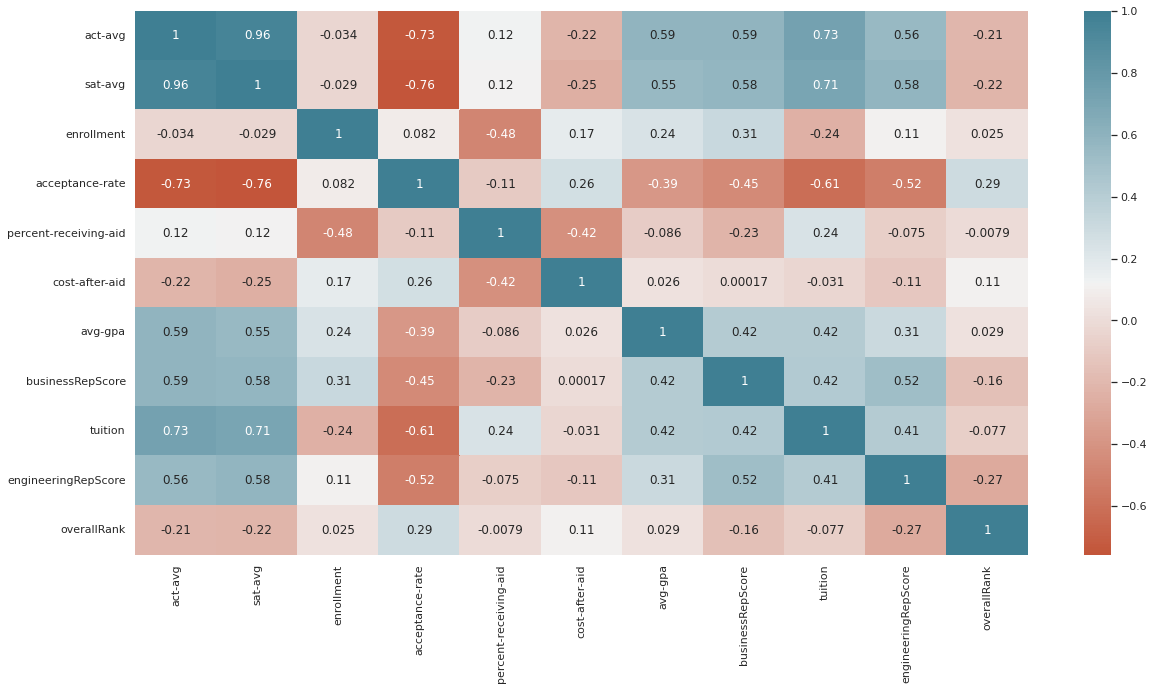

In [15]:
plt.figure(figsize=(20,10))
relation_map= university_stats_dataset.corr()
sns.heatmap(relation_map,cmap=sns.diverging_palette(20, 220, n=200),annot=True)
relation_map

**Plotting relationship between various columns**

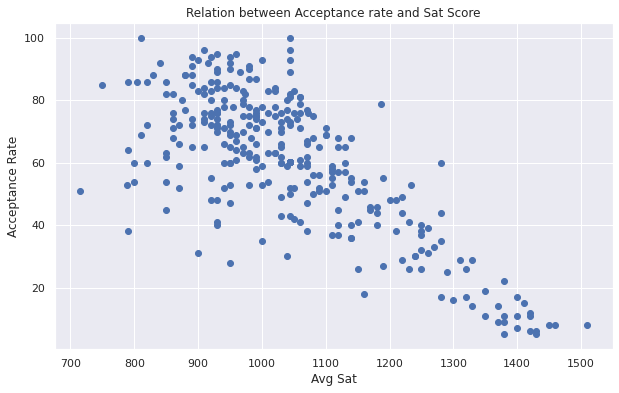

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(university_stats_dataset['sat-avg'], university_stats_dataset['acceptance-rate'])
ax.set_xlabel('Avg Sat')
ax.set_ylabel('Acceptance Rate')
plt.title("Relation between Acceptance rate and Sat Score")
plt.show()

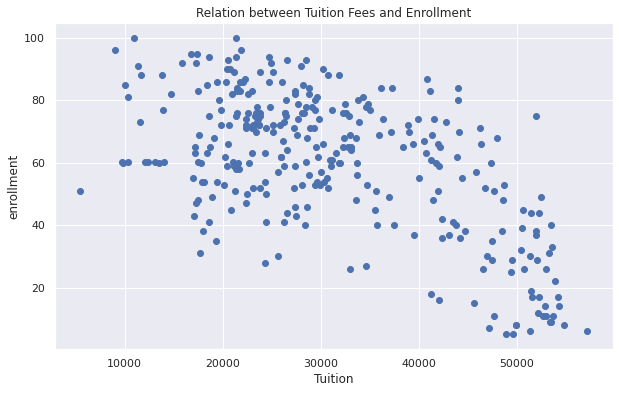

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(university_stats_dataset['tuition'], university_stats_dataset['acceptance-rate'])
ax.set_xlabel('Tuition')
ax.set_ylabel('enrollment')
plt.title("Relation between Tuition Fees and Enrollment")
plt.show()

**Importing the law school dataset and merging all the values**

In [18]:
law_school_dataset = pd.read_excel("/content/drive/MyDrive/Law_school_data.xlsx", index_col=1)
law_school_tuition_data = pd.read_excel("/content/drive/MyDrive/law_school_tuition.xlsx", index_col=1)
law_school_salary_data = pd.read_excel("/content/drive/MyDrive/law_school_salary.xlsx", index_col=1)

**Iterate the tuition dataset to compute the average of in-state and out-state tuition fees and merge into a single row**

In [19]:
tuition_dict = {}

for index, row in law_school_tuition_data.iterrows():
    if "in-state" in index:
        index = index[:-8].strip()
    elif "out-of-state" in index:
        index = index[:-12].strip()
    if index not in tuition_dict.keys():
        tuition_dict[index] = (row[0], row[1], row[2], row[3])
    else:
        tuition_dict[index] = (tuition_dict[index][0], tuition_dict[index][1], ((tuition_dict[index][2]+row[2])/2), tuition_dict[index][3])
        
law_school_tuition_data = pd.DataFrame.from_dict(tuition_dict, orient='index', columns=['No.', 'State', 'Tuition', 'Room & Board'])

law_school_tuition_data = law_school_tuition_data.astype({"No.": int, "State": str, "Tuition": float, "Room & Board": float})

#changing the No columns value to make it uniform across all the dataframes
law_school_tuition_data['No.'] = range(1, 1+len(law_school_tuition_data))
law_school_tuition_data.insert(1, "University Name", law_school_tuition_data.index)
law_school_tuition_data

,No.,University Name,State,Tuition,Room & Board
Albany Law School Union U.,1,Albany Law School Union U.,NY,47450.0,10750.0
American University,2,American University,DC,56724.0,18360.0
Appalachian School of Law,3,Appalachian School of Law,VA,35500.0,8930.0
Arizona State University,4,Arizona State University,AZ,36762.0,12688.0
Arizona Summit Law School,5,Arizona Summit Law School,AZ,NaN,NaN
...,...,...,...,...,...
Whittier Law School,196,Whittier Law School,CA,NaN,NaN
Widener (Commonwealth),197,Widener (Commonwealth),PA,45870.0,12150.0
Widener (Delaware),198,Widener (Delaware),DE,50616.0,12510.0
Willamette University,199,Willamette University,OR,44185.0,NaN


**Merging all the dataframes created above into a single dataframe**

In [20]:
#Creating a list of all the dataframes
df_list = [law_school_dataset, law_school_tuition_data, law_school_salary_data]

#Merging all the dataframes into a single dataframe
law_dataset_salary_dataframe = pd.merge(law_school_dataset, law_school_salary_data)

combined_dateset = pd.merge(law_dataset_salary_dataframe, law_school_tuition_data, how='left')

#Dropping unnamed columns from the datafram
combined_dateset = combined_dateset.loc[:, ~combined_dateset.columns.str.contains('^Unnamed')]

combined_dateset

,No.,GPA Low,GPA Median,GPA High,LSAT Low,LSAT Median,LSAT High,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Pass Bar,State Bar,Library,Male Fac.,Fem. Fac.,Min. Fac.,Min. Stu.,Median Salary Private,Median Salary Public,University Name,Tuition,Room & Board
0,1,3.06,3.32,3.62,151.0,153.0,156.0,0.546,8.1,0.536,0.800,NY,0.706,0.757,749251.0,0.568,0.432,0.108,0.232,73000.0,59000.0,Albany Law School Union U.,47450.0,10750.0
1,2,3.08,3.43,3.58,155.0,158.0,160.0,0.486,6.4,0.422,0.680,DC,0.660,0.701,558968.0,0.599,0.401,0.249,0.418,100000.0,56000.0,American University,56724.0,18360.0
2,3,2.64,3.05,3.32,143.0,144.0,147.0,0.626,NaN,NaN,0.595,VA,NaN,NaN,NaN,NaN,NaN,NaN,0.308,NaN,NaN,Appalachian School of Law,35500.0,8930.0
3,4,3.37,3.76,3.90,158.0,163.0,164.0,0.342,7.0,0.788,0.889,AZ,0.743,0.638,95735.0,0.683,0.317,0.192,0.315,82000.0,58500.0,Arizona State University,36762.0,12688.0
4,4,3.37,3.76,3.90,158.0,163.0,164.0,0.342,7.0,0.788,0.889,AZ,0.743,0.638,95735.0,0.683,0.317,0.192,0.315,NaN,NaN,Arizona State University,36762.0,12688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2.81,3.01,3.40,146.0,148.0,151.0,0.527,11.1,NaN,0.521,CA,0.583,0.583,14587.0,0.557,0.443,0.213,0.630,NaN,NaN,Western State University,36250.0,20616.0
196,197,2.83,3.11,3.45,145.0,147.0,148.0,0.621,9.1,0.230,0.672,PA,0.714,0.796,196222.0,0.679,0.321,0.038,0.253,69000.0,52000.0,Widener (Commonwealth),45870.0,12150.0
197,198,2.89,3.17,3.48,147.0,148.0,151.0,0.619,10.9,0.312,0.596,DE,0.660,0.796,340257.0,0.493,0.507,0.093,0.264,60000.0,50000.0,Widener (Delaware),50616.0,12510.0
198,199,2.71,3.13,3.45,149.0,152.0,155.0,0.754,8.6,0.320,0.700,OR,0.791,0.818,297661.0,0.582,0.418,0.091,0.305,60000.0,55600.0,Willamette University,44185.0,NaN


**Displaying first 10 rows of the law school dataset**

In [21]:
combined_dateset.head(10)

,No.,GPA Low,GPA Median,GPA High,LSAT Low,LSAT Median,LSAT High,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Pass Bar,State Bar,Library,Male Fac.,Fem. Fac.,Min. Fac.,Min. Stu.,Median Salary Private,Median Salary Public,University Name,Tuition,Room & Board
0,1,3.06,3.32,3.62,151.0,153.0,156.0,0.546,8.1,0.536,0.800,NY,0.706,0.757,749251.0,0.568,0.432,0.108,0.232,73000.0,59000.0,Albany Law School Union U.,47450.0,10750.0
1,2,3.08,3.43,3.58,155.0,158.0,160.0,0.486,6.4,0.422,0.680,DC,0.660,0.701,558968.0,0.599,0.401,0.249,0.418,100000.0,56000.0,American University,56724.0,18360.0
2,3,2.64,3.05,3.32,143.0,144.0,147.0,0.626,NaN,NaN,0.595,VA,NaN,NaN,NaN,NaN,NaN,NaN,0.308,NaN,NaN,Appalachian School of Law,35500.0,8930.0
3,4,3.37,3.76,3.90,158.0,163.0,164.0,0.342,7.0,0.788,0.889,AZ,0.743,0.638,95735.0,0.683,0.317,0.192,0.315,82000.0,58500.0,Arizona State University,36762.0,12688.0
4,4,3.37,3.76,3.90,158.0,163.0,164.0,0.342,7.0,0.788,0.889,AZ,0.743,0.638,95735.0,0.683,0.317,0.192,0.315,NaN,NaN,Arizona State University,36762.0,12688.0
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta's John Marshall Law,NaN,NaN
6,7,2.73,3.05,3.34,145.0,148.0,151.0,0.551,9.0,NaN,0.494,FL,0.534,0.679,88810.0,0.667,0.333,0.095,0.369,60000.0,45000.0,Ave Maria School of Law,42206.0,14562.0
7,7,2.73,3.05,3.34,145.0,148.0,151.0,0.551,9.0,NaN,0.494,FL,0.534,0.679,88810.0,0.667,0.333,0.095,0.369,NaN,NaN,Ave Maria School of Law,42206.0,14562.0
8,9,3.31,3.59,3.76,157.0,160.0,161.0,0.390,7.6,0.515,0.854,TX,0.921,0.745,126038.0,0.701,0.287,0.057,0.258,85000.0,61105.0,Baylor University,62432.0,13719.0
9,10,3.31,3.50,3.70,153.0,155.0,157.0,0.524,11.5,0.308,0.821,TN,0.926,0.744,22513.0,0.650,0.350,0.125,0.184,95000.0,52000.0,Belmont University,44470.0,15900.0


**Displaying last 10 rows of the law school dataset**

In [22]:
combined_dateset.tail(10)

,No.,GPA Low,GPA Median,GPA High,LSAT Low,LSAT Median,LSAT High,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Pass Bar,State Bar,Library,Male Fac.,Fem. Fac.,Min. Fac.,Min. Stu.,Median Salary Private,Median Salary Public,University Name,Tuition,Room & Board
190,191,3.26,3.50,3.69,155.0,158.0,161.0,0.481,7.6,0.368,0.728,MI,0.778,0.751,633352.0,0.545,0.455,0.130,0.222,84000.0,55000.0,Wayne State U.,34371.0,14148.0
191,192,3.04,3.38,3.64,151.0,153.0,155.0,0.615,6.9,0.434,0.783,WV,0.773,0.750,142060.0,0.579,0.421,0.088,0.108,70000.0,55000.0,West Virginia U.,31977.0,11970.0
192,193,2.64,3.02,3.33,139.0,142.0,147.0,0.861,6.1,NaN,0.472,MI,0.439,0.757,753000.0,0.655,0.345,0.142,0.525,NaN,NaN,Western Michigan (Cooley),50750.0,12030.0
193,194,2.82,3.29,3.62,146.0,148.0,152.0,0.587,6.0,NaN,0.564,MA,0.545,0.764,364161.0,0.592,0.408,0.113,0.329,50000.0,55205.0,Western New England,42218.0,13000.0
194,195,2.81,3.01,3.40,146.0,148.0,151.0,0.527,11.1,NaN,0.521,CA,0.583,0.583,14587.0,0.557,0.443,0.213,0.630,72500.0,50000.0,Western State University,36250.0,20616.0
195,195,2.81,3.01,3.40,146.0,148.0,151.0,0.527,11.1,NaN,0.521,CA,0.583,0.583,14587.0,0.557,0.443,0.213,0.630,NaN,NaN,Western State University,36250.0,20616.0
196,197,2.83,3.11,3.45,145.0,147.0,148.0,0.621,9.1,0.230,0.672,PA,0.714,0.796,196222.0,0.679,0.321,0.038,0.253,69000.0,52000.0,Widener (Commonwealth),45870.0,12150.0
197,198,2.89,3.17,3.48,147.0,148.0,151.0,0.619,10.9,0.312,0.596,DE,0.660,0.796,340257.0,0.493,0.507,0.093,0.264,60000.0,50000.0,Widener (Delaware),50616.0,12510.0
198,199,2.71,3.13,3.45,149.0,152.0,155.0,0.754,8.6,0.320,0.700,OR,0.791,0.818,297661.0,0.582,0.418,0.091,0.305,60000.0,55600.0,Willamette University,44185.0,NaN
199,200,3.84,3.92,3.98,170.0,173.0,176.0,0.069,4.2,0.817,0.835,CT,0.983,0.757,1364230.0,0.650,0.350,0.117,0.461,180000.0,62591.0,Yale University,64267.0,17595.0


**Displaying datatype of each column of the law dataset**

In [23]:
combined_dateset.dtypes

No.                        int64
GPA Low                  float64
GPA Median               float64
GPA High                 float64
LSAT Low                 float64
LSAT Median              float64
LSAT High                float64
Accept                   float64
S/F Ratio                float64
Employment at Grad       float64
Employment at 10Mos      float64
State                     object
Pass Bar                 float64
State Bar                float64
Library                  float64
Male Fac.                float64
Fem. Fac.                float64
Min. Fac.                float64
Min. Stu.                float64
Median Salary Private    float64
Median Salary Public     float64
University Name           object
Tuition                  float64
Room & Board             float64
dtype: object

**Dropping the irrelevant columns from Law school dataset**

Following columns are dropped from the dataset:
GPA Low, GPA High, LSAT Low, LSAT High, Pass Bar, State Bar, Library, Male Fac., Fem. Fac., Min. Fac., Min. Stu., No., Room & Board


In [24]:
combined_dataset_upd = combined_dateset.drop(['GPA Low','GPA High','LSAT Low','LSAT High','Pass Bar','State Bar','Library','Male Fac.','Fem. Fac.','Min. Fac.','Min. Stu.','No.','Room & Board'],axis =1)


In [25]:
combined_dataset_upd

,GPA Median,LSAT Median,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Median Salary Private,Median Salary Public,University Name,Tuition
0,3.32,153.0,0.546,8.1,0.536,0.800,NY,73000.0,59000.0,Albany Law School Union U.,47450.0
1,3.43,158.0,0.486,6.4,0.422,0.680,DC,100000.0,56000.0,American University,56724.0
2,3.05,144.0,0.626,NaN,NaN,0.595,VA,NaN,NaN,Appalachian School of Law,35500.0
3,3.76,163.0,0.342,7.0,0.788,0.889,AZ,82000.0,58500.0,Arizona State University,36762.0
4,3.76,163.0,0.342,7.0,0.788,0.889,AZ,NaN,NaN,Arizona State University,36762.0
...,...,...,...,...,...,...,...,...,...,...,...
195,3.01,148.0,0.527,11.1,NaN,0.521,CA,NaN,NaN,Western State University,36250.0
196,3.11,147.0,0.621,9.1,0.230,0.672,PA,69000.0,52000.0,Widener (Commonwealth),45870.0
197,3.17,148.0,0.619,10.9,0.312,0.596,DE,60000.0,50000.0,Widener (Delaware),50616.0
198,3.13,152.0,0.754,8.6,0.320,0.700,OR,60000.0,55600.0,Willamette University,44185.0


**Changing the LSAT score to SAT score scale**

Changing the LSAT score from scale of 120-180 to 400-1600

In [26]:
interval_min = 400
interval_max = 1600

combined_dataset_upd['SAT Median'] = (combined_dataset_upd['LSAT Median']- np.min(combined_dataset_upd['LSAT Median'])/( np.max(combined_dataset_upd['LSAT Median'])-np.min(combined_dataset_upd['LSAT Median'])*(interval_max - interval_min)+interval_min ))

combined_dataset_upd = combined_dataset_upd.drop('LSAT Median', axis=1)

**Displaying descriptive statistics for Law dataset**

In [27]:
combined_dataset_upd.describe().T

,count,mean,std,min,25%,50%,75%,max
GPA Median,196.0,3.442653,0.244236,2.800000,3.280000,3.450000,3.610000,3.930000
Accept,196.0,0.455969,0.149756,0.069000,0.347250,0.481000,0.561000,0.861000
S/F Ratio,192.0,7.178646,1.933857,3.500000,5.975000,6.900000,8.025000,17.000000
Employment at Grad,168.0,0.509863,0.189154,0.086000,0.373000,0.486000,0.610250,0.949000
Employment at 10Mos,196.0,0.748883,0.125892,0.276000,0.681000,0.769000,0.835000,0.969000
Median Salary Private,185.0,87446.286486,39691.587822,45500.000000,62400.000000,72500.000000,95000.000000,180000.000000
Median Salary Public,184.0,54461.510870,7092.035884,40000.000000,50000.000000,54791.500000,60000.000000,90518.000000
Tuition,197.0,42143.647208,11939.794275,13060.000000,32950.500000,42190.000000,50700.000000,69916.000000
SAT Median,196.0,156.306959,6.711503,142.000836,151.750836,155.000836,161.000836,173.000836


In [28]:
combined_dataset_upd

,GPA Median,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Median Salary Private,Median Salary Public,University Name,Tuition,SAT Median
0,3.32,0.546,8.1,0.536,0.800,NY,73000.0,59000.0,Albany Law School Union U.,47450.0,153.000836
1,3.43,0.486,6.4,0.422,0.680,DC,100000.0,56000.0,American University,56724.0,158.000836
2,3.05,0.626,NaN,NaN,0.595,VA,NaN,NaN,Appalachian School of Law,35500.0,144.000836
3,3.76,0.342,7.0,0.788,0.889,AZ,82000.0,58500.0,Arizona State University,36762.0,163.000836
4,3.76,0.342,7.0,0.788,0.889,AZ,NaN,NaN,Arizona State University,36762.0,163.000836
...,...,...,...,...,...,...,...,...,...,...,...
195,3.01,0.527,11.1,NaN,0.521,CA,NaN,NaN,Western State University,36250.0,148.000836
196,3.11,0.621,9.1,0.230,0.672,PA,69000.0,52000.0,Widener (Commonwealth),45870.0,147.000836
197,3.17,0.619,10.9,0.312,0.596,DE,60000.0,50000.0,Widener (Delaware),50616.0,148.000836
198,3.13,0.754,8.6,0.320,0.700,OR,60000.0,55600.0,Willamette University,44185.0,152.000836


**Finding relationship between Law school variables - HeatMap**

,GPA Median,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,Median Salary Private,Median Salary Public,Tuition,SAT Median
GPA Median,1.000000,-0.739403,-0.520405,0.743961,0.801200,0.635878,0.200149,0.386740,0.924692
Accept,-0.739403,1.000000,0.424942,-0.677067,-0.553890,-0.683326,-0.283974,-0.385054,-0.820443
S/F Ratio,-0.520405,0.424942,1.000000,-0.346650,-0.377370,-0.318947,-0.175269,-0.209339,-0.489522
Employment at Grad,0.743961,-0.677067,-0.346650,1.000000,0.784678,0.695208,0.208602,0.419083,0.799047
Employment at 10Mos,0.801200,-0.553890,-0.377370,0.784678,1.000000,0.498779,0.132586,0.296927,0.770232
Median Salary Private,0.635878,-0.683326,-0.318947,0.695208,0.498779,1.000000,0.385500,0.605586,0.754171
Median Salary Public,0.200149,-0.283974,-0.175269,0.208602,0.132586,0.385500,1.000000,0.368156,0.266443
Tuition,0.386740,-0.385054,-0.209339,0.419083,0.296927,0.605586,0.368156,1.000000,0.534420
SAT Median,0.924692,-0.820443,-0.489522,0.799047,0.770232,0.754171,0.266443,0.534420,1.000000


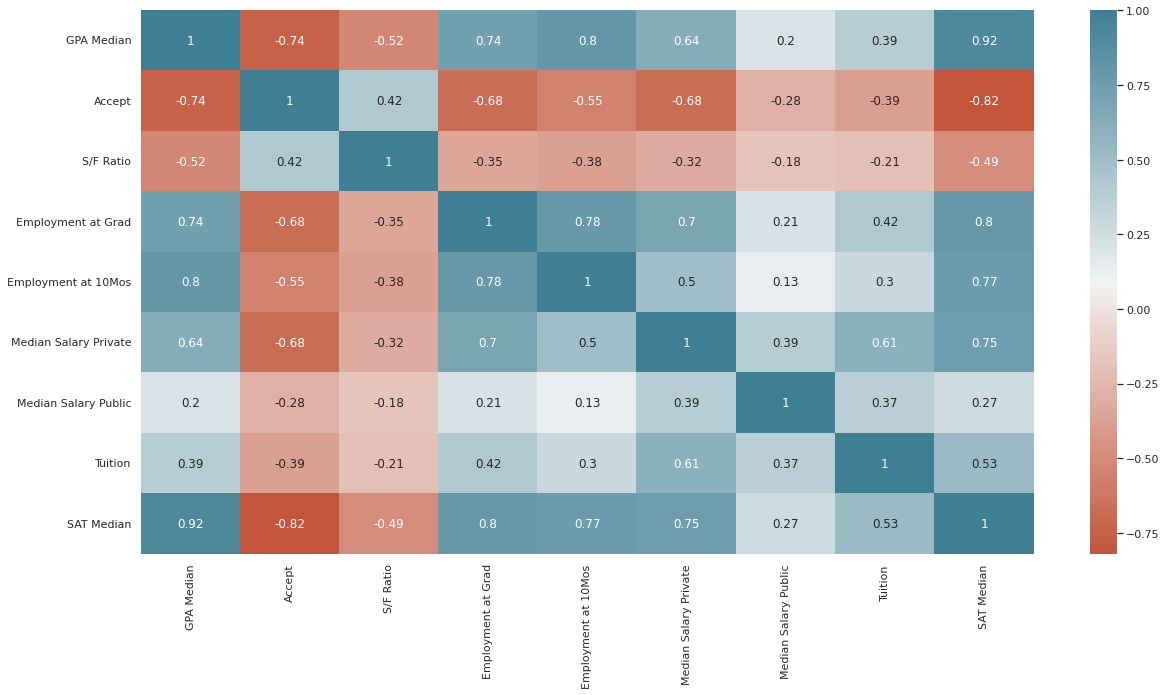

In [29]:
plt.figure(figsize=(20,10))
relation_map2= combined_dataset_upd.corr()
sns.heatmap(relation_map2,cmap=sns.diverging_palette(20, 220, n=200),annot=True)
relation_map2

**Checking presence of duplicate rows**

In [30]:
duplicate_val = combined_dataset_upd[combined_dataset_upd.duplicated()]

print("Number of rows containing duplicate values: ", duplicate_val.shape)

Number of rows containing duplicate values:  (0, 11)


**Checking the presence of NULL values in dataset - Law School**

In [31]:
combined_dataset_upd.isna().sum()

GPA Median                4
Accept                    4
S/F Ratio                 8
Employment at Grad       32
Employment at 10Mos       4
State                     0
Median Salary Private    15
Median Salary Public     16
University Name           0
Tuition                   3
SAT Median                4
dtype: int64

**Replacing the NULL values with the mean**

In [32]:
combined_dataset_upd.fillna((combined_dataset_upd.mean()), inplace= True)
combined_dataset_upd.head(30)

,GPA Median,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Median Salary Private,Median Salary Public,University Name,Tuition,SAT Median
0,3.320000,0.546000,8.100000,0.536000,0.800000,NY,73000.000000,59000.00000,Albany Law School Union U.,47450.000000,153.000836
1,3.430000,0.486000,6.400000,0.422000,0.680000,DC,100000.000000,56000.00000,American University,56724.000000,158.000836
2,3.050000,0.626000,7.178646,0.509863,0.595000,VA,87446.286486,54461.51087,Appalachian School of Law,35500.000000,144.000836
3,3.760000,0.342000,7.000000,0.788000,0.889000,AZ,82000.000000,58500.00000,Arizona State University,36762.000000,163.000836
4,3.760000,0.342000,7.000000,0.788000,0.889000,AZ,87446.286486,54461.51087,Arizona State University,36762.000000,163.000836
5,3.442653,0.455969,7.178646,0.509863,0.748883,GA,87446.286486,54461.51087,Atlanta's John Marshall Law,42143.647208,156.306959
6,3.050000,0.551000,9.000000,0.509863,0.494000,FL,60000.000000,45000.00000,Ave Maria School of Law,42206.000000,148.000836
7,3.050000,0.551000,9.000000,0.509863,0.494000,FL,87446.286486,54461.51087,Ave Maria School of Law,42206.000000,148.000836
8,3.590000,0.390000,7.600000,0.515000,0.854000,TX,85000.000000,61105.00000,Baylor University,62432.000000,160.000836
9,3.500000,0.524000,11.500000,0.308000,0.821000,TN,95000.000000,52000.00000,Belmont University,44470.000000,155.000836


**Graphical Representation of attributes of law scchool dataset**

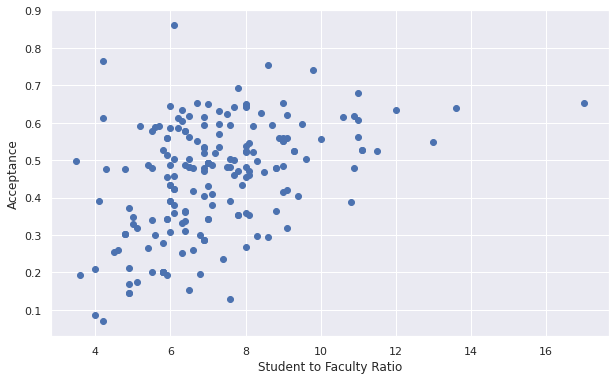

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(combined_dateset['S/F Ratio'], combined_dateset['Accept'])
ax.set_xlabel('Student to Faculty Ratio')
ax.set_ylabel('Acceptance')
plt.show()

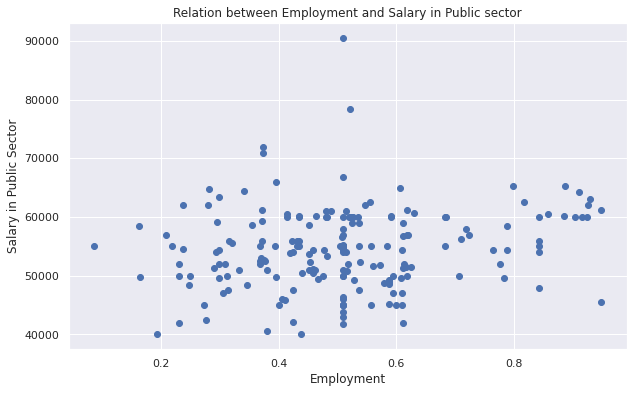

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(combined_dataset_upd['Employment at Grad'], combined_dataset_upd['Median Salary Public'])
ax.set_xlabel('Employment')
ax.set_ylabel('Salary in Public Sector')
plt.title("Relation between Employment and Salary in Public sector")
plt.show()

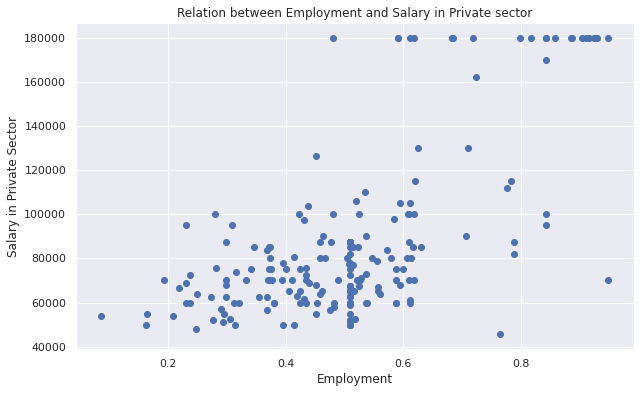

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(combined_dataset_upd['Employment at Grad'], combined_dataset_upd['Median Salary Private'])
ax.set_xlabel('Employment')
ax.set_ylabel('Salary in Private Sector')
plt.title("Relation between Employment and Salary in Private sector")
plt.show()

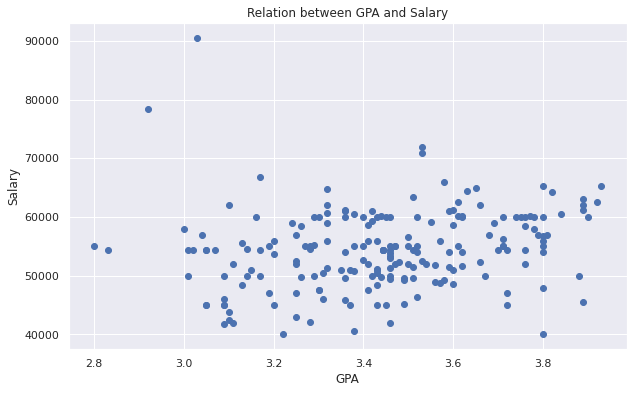

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(combined_dataset_upd['GPA Median'], combined_dataset_upd['Median Salary Public'])
ax.set_xlabel('GPA')
ax.set_ylabel('Salary')
plt.title("Relation between GPA and Salary")
plt.show()

**Getting list of common universities from both the datasets**

In [37]:
common_university_list = []
for uni1 in combined_dataset_upd['University Name']:
    for uni2 in university_stats_dataset['UniName']:
        #if uni2.startswith(uni1):
        if uni2.startswith(uni1):
            if uni1 not in common_university_list:
                common_university_list.append(uni1)
            else:
                continue
print(common_university_list)
print(len(common_university_list))

['American University', 'Arizona State University', 'Baylor University', 'Boston College', 'Brigham Young University', 'College of William and Mary', 'Columbia University', 'Cornell University', 'DePaul University', 'Duke University', 'Duquesne University', 'Emory University', 'Florida A&M University', 'Fordham University', 'Georgia State University', 'Harvard University', 'Hofstra University', 'Howard University', 'Liberty University', 'Marquette University', 'Michigan State University', 'Northeastern University', 'Northern Illinois University', 'Northwestern University', 'Pace University', 'Pepperdine University', 'Regent University', 'Seton Hall University', "St. John's University", 'Stanford University', 'Suffolk University', 'Syracuse University', 'Texas A&M University', 'Tulane University', 'Vanderbilt University', 'Villanova University', 'Wake Forest University', 'Yale University']
38


In [38]:
university_stats_dataset

,act-avg,sat-avg,enrollment,acceptance-rate,percent-receiving-aid,cost-after-aid,state,avg-gpa,rankingDisplayRank,businessRepScore,tuition,engineeringRepScore,UniName,schoolType,overallRank,institutionalControl
0,32.000000,1400.000000,5400.000000,7.000000,60.00000,16793.000000,NJ,3.900000,#1,2.832479,47140,4.100000,Princeton University,national-universities,1,private
1,32.000000,1430.000000,6710.000000,5.000000,55.00000,16338.000000,MA,4.000000,#2,2.832479,48949,3.600000,Harvard University,national-universities,2,private
2,32.000000,1450.000000,5941.000000,8.000000,42.00000,27767.000000,IL,4.000000,#3,2.832479,54825,2.803398,University of Chicago,national-universities,3,private
3,32.000000,1420.000000,5472.000000,6.000000,50.00000,18385.000000,CT,3.543443,#3,2.832479,51400,3.400000,Yale University,national-universities,3,private
4,32.000000,1430.000000,6113.000000,6.000000,48.00000,21041.000000,NY,3.543443,#5,2.832479,57208,3.800000,Columbia University,national-universities,5,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,23.024055,1044.027491,14895.256667,96.000000,35.27972,33920.867133,CA,3.543443,Unranked,2.832479,9000,2.803398,Trident University International,national-universities,-2,proprietary
307,23.024055,1044.027491,14895.256667,60.390728,35.27972,33920.867133,OH,3.543443,Unranked,2.832479,12416,2.803398,Union Institute and University,national-universities,-2,private
308,23.024055,1044.027491,14895.256667,60.390728,35.27972,33920.867133,AZ,3.543443,Unranked,2.832479,9690,2.803398,University of Phoenix,national-universities,-2,proprietary
309,23.024055,1044.027491,14895.256667,60.390728,35.27972,33920.867133,MN,3.543443,Unranked,2.832479,12075,2.803398,Walden University,national-universities,-2,proprietary


**Creating University list having both Engineering and Business Reputation**

In [39]:
temp_tuple_list = []
for index, row in university_stats_dataset.iterrows():
    for uni in common_university_list:
        if (uni.startswith(row[12]) and pd.notna(row[11]) and pd.notna(row[10])):
            temp_tuple_list.append((row[12], row[11], row[10]))
            
temp_tuple_list.sort()
print(temp_tuple_list)
print(len(temp_tuple_list))

[('American University', 2.8033980582524305, 46615), ('Baylor University', 2.4, 43790), ('Boston College', 2.8033980582524305, 53346), ('College of William and Mary', 2.8033980582524305, 43099), ('Columbia University', 3.8, 57208), ('Cornell University', 4.2, 52853), ('DePaul University', 2.8033980582524305, 39010), ('Duke University', 3.7, 53744), ('Duquesne University', 2.8033980582524305, 36394), ('Emory University', 2.8033980582524305, 49392), ('Florida A&M University', 2.3, 17725), ('Fordham University', 2.8033980582524305, 50601), ('Georgia State University', 2.8033980582524305, 29432), ('Harvard University', 3.6, 48949), ('Hofstra University', 3.0, 43960), ('Howard University', 2.2, 25697), ('Liberty University', 2.2, 24304), ('Marquette University', 2.4, 39900), ('Michigan State University', 3.1, 39405), ('Northeastern University', 3.1, 49497), ('Northern Illinois University', 2.7, 23817), ('Northwestern University', 4.0, 52678), ('Pace University', 2.8033980582524305, 44036), 

**Extracting the row having common universities from University Statistics dataset**

In [40]:
uni_stat_having_common_univ = pd.DataFrame()
for uni1 in university_stats_dataset["UniName"]:
    for university in temp_tuple_list:
        if uni1 == university[0]:
            uni_stat_having_common_univ = uni_stat_having_common_univ.append(university_stats_dataset.loc[university_stats_dataset['UniName'] == uni1])
        else:
            continue
uni_stat_having_common_univ

,act-avg,sat-avg,enrollment,acceptance-rate,percent-receiving-aid,cost-after-aid,state,avg-gpa,rankingDisplayRank,businessRepScore,tuition,engineeringRepScore,UniName,schoolType,overallRank,institutionalControl
1,32.0,1430.000000,6710.0,5.0,55.00000,16338.000000,MA,4.000000,#2,2.832479,48949,3.600000,Harvard University,national-universities,2,private
3,32.0,1420.000000,5472.0,6.0,50.00000,18385.000000,CT,3.543443,#3,2.832479,51400,3.400000,Yale University,national-universities,3,private
4,32.0,1430.000000,6113.0,6.0,48.00000,21041.000000,NY,3.543443,#5,2.832479,57208,3.800000,Columbia University,national-universities,5,private
6,31.0,1380.000000,7034.0,5.0,47.00000,19296.000000,CA,3.543443,#5,2.832479,49617,4.800000,Stanford University,national-universities,5,private
8,31.0,1380.000000,6609.0,11.0,41.00000,23374.000000,NC,3.543443,#9,2.832479,53744,3.700000,Duke University,national-universities,9,private
12,32.0,1400.000000,8353.0,11.0,43.00000,31087.000000,IL,3.543443,#11,2.832479,52678,4.000000,Northwestern University,national-universities,11,private
14,31.0,1330.000000,14566.0,14.0,44.00000,28068.000000,NY,3.543443,#14,4.200000,52853,4.200000,Cornell University,national-universities,14,private
16,32.0,1420.000000,6871.0,11.0,46.00000,23323.000000,TN,3.800000,#14,2.832479,47664,3.400000,Vanderbilt University,national-universities,14,private
20,30.0,1290.000000,6861.0,25.0,42.00000,24264.000000,GA,3.700000,#21,3.800000,49392,2.803398,Emory University,national-universities,21,private
26,28.0,1240.000000,4955.0,30.0,30.00000,24241.000000,NC,3.543443,#27,3.400000,51400,2.803398,Wake Forest University,national-universities,27,private


**Extracting the rows having common universities from Law school dataset**

In [41]:
law_having_common_univ = pd.DataFrame()
for uni1 in combined_dataset_upd["University Name"]:
    for university in temp_tuple_list:
        if uni1 == university[0]:
            law_having_common_univ = law_having_common_univ.append(combined_dataset_upd.loc[combined_dataset_upd['University Name'] == uni1])
        else:
            continue
law_having_common_univ = law_having_common_univ.drop_duplicates(subset=['University Name'])
law_having_common_univ


,GPA Median,Accept,S/F Ratio,Employment at Grad,Employment at 10Mos,State,Median Salary Private,Median Salary Public,University Name,Tuition,SAT Median
1,3.43,0.486,6.4,0.422000,0.680,DC,100000.0,56000.0,American University,56724.0,158.000836
8,3.59,0.390,7.6,0.515000,0.854,TX,85000.0,61105.0,Baylor University,62432.0,160.000836
10,3.62,0.286,6.9,0.592000,0.849,MA,180000.0,60223.0,Boston College,54750.0,164.000836
24,3.80,0.361,6.4,0.611000,0.808,VA,105000.0,56748.0,College of William and Mary,38500.0,162.000836
25,3.75,0.168,4.9,0.924000,0.933,NY,180000.0,60000.0,Columbia University,69916.0,172.000836
27,3.82,0.211,4.9,0.911000,0.931,NY,180000.0,64228.0,Cornell University,65541.0,167.000836
30,3.20,0.587,6.2,0.452000,0.696,IL,68000.0,53750.0,DePaul University,48166.0,153.000836
33,3.78,0.202,5.5,0.916000,0.956,NC,180000.0,60000.0,Duke University,64722.0,169.000836
34,3.38,0.632,7.3,0.381000,0.794,PA,60000.0,40553.0,Duquesne University,44944.0,152.000836
36,3.79,0.296,8.3,0.620000,0.793,GA,115000.0,57000.0,Emory University,57348.0,165.000836


**Selecting relevant columns from University Statistics for model training**

In [42]:
university_stats_dataset.drop(university_stats_dataset.columns.difference(['sat-avg','acceptance-rate','avg-gpa','tuition','engineeringRepScore']), 1, inplace=True)

**Checking the updated dataframe information**

In [43]:
university_stats_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sat-avg              311 non-null    float64
 1   acceptance-rate      311 non-null    float64
 2   avg-gpa              311 non-null    float64
 3   tuition              311 non-null    int64  
 4   engineeringRepScore  311 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 12.3 KB


**Dividing University Statistics dataset into train and test sets**

In [44]:
test_size = int(len(university_stats_dataset) * 0.1)
train_data = university_stats_dataset.iloc[:-test_size,:].copy() 
test_data = university_stats_dataset.iloc[-test_size:,:].copy()
print(train_data.shape, test_data.shape)

(280, 5) (31, 5)


In [45]:
train_data.head(30)

,sat-avg,acceptance-rate,avg-gpa,tuition,engineeringRepScore
0,1400.0,7.0,3.900000,47140,4.100000
1,1430.0,5.0,4.000000,48949,3.600000
2,1450.0,8.0,4.000000,54825,2.803398
3,1420.0,6.0,3.543443,51400,3.400000
4,1430.0,6.0,3.543443,57208,3.800000
5,1460.0,8.0,3.543443,49892,4.900000
6,1380.0,5.0,3.543443,49617,4.800000
7,1380.0,9.0,3.900000,53534,3.600000
8,1380.0,11.0,3.543443,53744,3.700000
9,1510.0,8.0,3.543443,49908,4.600000


**Segregating the target value from the dataset to train the model**

In [46]:
X_train_data = train_data.drop(['engineeringRepScore'],axis=1).copy()
y_train_data = train_data[['engineeringRepScore']].copy()
print(X_train_data.shape,y_train_data.shape)

(280, 4) (280, 1)


**Scaling the feature values to range from 0 to 1**

In [47]:
Xscalar = MinMaxScaler(feature_range= (0,1))
Xscalar.fit(X_train_data)
scaled_X_train = Xscalar.transform(X_train_data)
print(scaled_X_train.shape)

Yscalar = MinMaxScaler(feature_range= (0,1))
Yscalar.fit(y_train_data)
scaled_y_train = Yscalar.transform(y_train_data)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1)
print(scaled_y_train.shape)

(280, 4)
(280, 1)
(280,)


In [48]:
scaled_y_train

array([0.72413793, 0.55172414, 0.27703381, 0.48275862, 0.62068966,
       1.        , 0.96551724, 0.55172414, 0.5862069 , 0.89655172,
       0.4137931 , 0.65517241, 0.68965517, 0.44827586, 0.75862069,
       0.5862069 , 0.48275862, 0.44827586, 0.44827586, 0.27703381,
       0.27703381, 0.93103448, 0.62068966, 0.55172414, 0.79310345,
       0.48275862, 0.27703381, 0.82758621, 0.34482759, 0.31034483,
       0.27703381, 0.27703381, 0.27703381, 0.27703381, 0.89655172,
       0.24137931, 0.37931034, 0.44827586, 0.48275862, 0.37931034,
       0.13793103, 0.51724138, 0.44827586, 0.5862069 , 0.48275862,
       0.4137931 , 0.27703381, 0.51724138, 0.17241379, 0.65517241,
       0.17241379, 0.5862069 , 0.82758621, 0.51724138, 0.10344828,
       0.20689655, 0.79310345, 0.31034483, 0.72413793, 0.5862069 ,
       0.20689655, 0.27703381, 0.17241379, 0.20689655, 0.55172414,
       0.31034483, 0.34482759, 0.37931034, 0.27703381, 0.37931034,
       0.24137931, 0.65517241, 0.55172414, 0.65517241, 0.13793

**Formatting the target value to insert into the RNN model**

In [49]:
scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

**Creating batches for training**

In [50]:
n_input = 1
n_features= X_train_data.shape[1] 
b_size = 1
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

In [51]:
print(generator[0][0].shape)

(1, 1, 4)


**Defining the Keras Model**

1. Creating a Sequential model
2. Added LSTM layer with the "RELU" activation function
3. Fully connected layer with 1 hidden dense layer
4. Compiling the model with "ADAM" as optimization technique and "Mean Squared Error" as the loss function
5. Printing the model summary

In [52]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               93000     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 93,151
Trainable params: 93,151
Non-trainable params: 0
_________________________________________________________________


**Fitting the RNN model with training dataset for 5 epochs**

In [53]:
model.fit(generator,epochs=5)

Epoch 1/5
279/279 [==============================] - 2s 3ms/step - loss: 0.0310
Epoch 2/5
279/279 [==============================] - 1s 3ms/step - loss: 0.0251
Epoch 3/5
279/279 [==============================] - 1s 3ms/step - loss: 0.0241
Epoch 4/5
279/279 [==============================] - 1s 3ms/step - loss: 0.0233
Epoch 5/5
279/279 [==============================] - 1s 3ms/step - loss: 0.0234


**Plotting loss per epoch for the model**

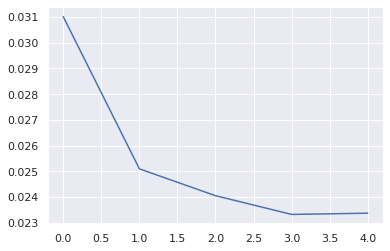

In [54]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

**Scaling the test data**

In [55]:
X_test_data = test_data.drop("engineeringRepScore",axis=1).copy()
scaled_X_test = Xscalar.transform(X_test_data)
print(scaled_X_test.shape)

(31, 4)


**Creating batches for validation**

In [56]:
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test_data)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(1, 1, 4)


**Predicting the values on test dataset**

In [57]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscalar.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test_data["engineeringRepScore"].values[n_input:],'y_pred':y_pred.ravel()})
print(results)

      y_true    y_pred
0   2.200000  2.648606
1   2.803398  2.609658
2   2.803398  2.604138
3   2.803398  2.749275
4   2.803398  2.618471
5   2.600000  2.744464
6   2.803398  2.629154
7   2.400000  2.600779
8   2.100000  2.733687
9   2.100000  2.541911
10  2.100000  2.629612
11  2.803398  2.691163
12  2.100000  2.644984
13  2.100000  2.620193
14  2.803398  2.785298
15  2.400000  2.585432
16  2.803398  2.659486
17  2.200000  2.580276
18  2.200000  2.613322
19  2.803398  2.603759
20  2.803398  2.605911
21  2.803398  2.768719
22  2.803398  2.870755
23  2.100000  2.774550
24  2.803398  2.822490
25  2.803398  2.749691
26  2.803398  2.683076
27  2.803398  2.763652
28  2.803398  2.745336
29  2.803398  2.761307


**Renaming the columns**

Accept: acceptance-rate,
GPA Median: avg-gpa,
SAT Median: sat-avg,
Tuition: tuition

In [58]:
law_having_common_univ_1 = law_having_common_univ.rename(columns={'Accept':'acceptance-rate','GPA Median':'avg-gpa','SAT Median':'sat-avg','Tuition':'tuition'})


**Reindexing the columns of dataframe**

In [59]:
law_having_common_univ_1 = law_having_common_univ_1.reindex(columns=['sat-avg','acceptance-rate','avg-gpa','tuition'])


In [60]:
law_having_common_univ_1

,sat-avg,acceptance-rate,avg-gpa,tuition
1,158.000836,0.486,3.43,56724.0
8,160.000836,0.390,3.59,62432.0
10,164.000836,0.286,3.62,54750.0
24,162.000836,0.361,3.80,38500.0
25,172.000836,0.168,3.75,69916.0
27,167.000836,0.211,3.82,65541.0
30,153.000836,0.587,3.20,48166.0
33,169.000836,0.202,3.78,64722.0
34,152.000836,0.632,3.38,44944.0
36,165.000836,0.296,3.79,57348.0


In [61]:
university_stats_dataset

,sat-avg,acceptance-rate,avg-gpa,tuition,engineeringRepScore
0,1400.000000,7.000000,3.900000,47140,4.100000
1,1430.000000,5.000000,4.000000,48949,3.600000
2,1450.000000,8.000000,4.000000,54825,2.803398
3,1420.000000,6.000000,3.543443,51400,3.400000
4,1430.000000,6.000000,3.543443,57208,3.800000
...,...,...,...,...,...
306,1044.027491,96.000000,3.543443,9000,2.803398
307,1044.027491,60.390728,3.543443,12416,2.803398
308,1044.027491,60.390728,3.543443,9690,2.803398
309,1044.027491,60.390728,3.543443,12075,2.803398


****

**Scaling the dataset between 0 and 1 for uniformity**

In [62]:
scaled_Xlaw_test = Xscalar.transform(law_having_common_univ_1)
print(scaled_Xlaw_test.shape)

(35, 4)


In [63]:
test_generator_law = TimeseriesGenerator(scaled_Xlaw_test, np.zeros(len(scaled_Xlaw_test)), length=n_input, batch_size=1)
print(test_generator_law[0][0].shape)

(1, 1, 4)


**Predicting the Law Reputation score**

In [64]:
law_pred_scaled = model.predict(test_generator_law)
law_pred = Yscalar.inverse_transform(law_pred_scaled)
results = pd.DataFrame({'y_pred':law_pred.ravel()})
print(results)

      y_pred
0   2.443538
1   2.516582
2   2.480226
3   2.442077
4   2.616744
5   2.603146
6   2.355170
7   2.588655
8   2.373945
9   2.541316
10  2.271341
11  2.510093
12  2.326514
13  2.627138
14  2.452025
15  2.311644
16  2.337096
17  2.388549
18  2.400026
19  2.450944
20  2.268139
21  2.602968
22  2.373860
23  2.486466
24  2.372823
25  2.441959
26  2.502539
27  2.617563
28  2.387815
29  2.403318
30  2.449424
31  2.547076
32  2.423280
33  2.430847


**Visualizing the Reputation score for both the datasets**

In [73]:
eng_rep_score = uni_stat_having_common_univ[['engineeringRepScore']].copy()
eng_rep = pd.DataFrame(eng_rep_score).to_numpy()

x = np.arange(35)
y = np.arange(34)

Text(0.5, 1.0, 'Law Dataset')

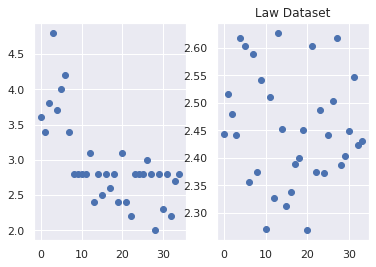

In [74]:
fig = plt.figure()

ax1 = fig.add_subplot(121)

ax2 = fig.add_subplot(122)


data_1 = uni_stat_having_common_univ["engineeringRepScore"]

data_2 = law_pred

ax1.scatter(x,data_1)

ax2.scatter(y,data_2)

plt.title("Law Dataset")